Support Vector Machines are a particularly powerful and flexible class of supervised algorithms for both classification and regression.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

Naive Bayes Classification was an example of generative classification; here we will instead consider discriminative classification: rather than modeling each class, we simply find a line or curve(in two dimensions) or manifold(in multiple dimensions) that divides the classes from each other.

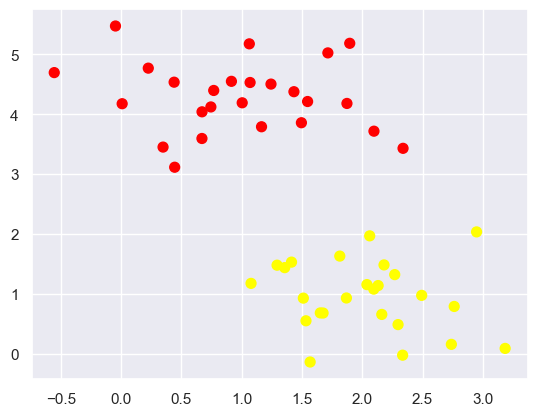

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

# Support Vector Machines: Maximizing the Margin

In [5]:
from sklearn.svm import SVC # "support vector classifier"
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us.

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X,Y,p,colors='k',
              levels=[-1,0,1],alpla=0.5,
              linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/var/folders/7k/578pqnvd7t9_87g17msvh4100000gn/T/ipykernel_12490/2909079731.py:16: UserWarning: The following kwargs were not used by contour: 'alpla'
  ax.contour(X,Y,p,colors='k',


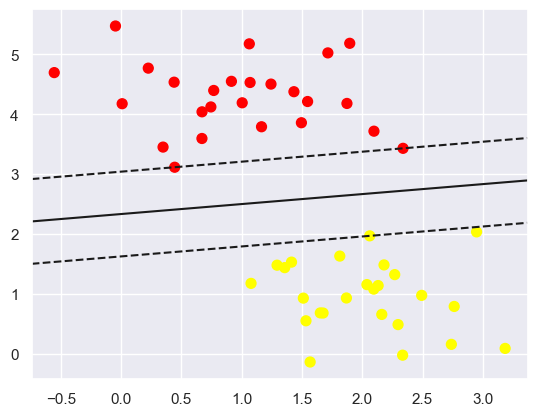

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin; they are the pivotal elements of this fit, and are known as the support vectors,and give the algorithm its name. In Scikit-Learn, the identity of these points is stored in the support_vectors attribute of the classifier:

In [12]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with karnels.

To motivate the need for kernels, let's look at some data that is not linearly separable.

/var/folders/7k/578pqnvd7t9_87g17msvh4100000gn/T/ipykernel_12490/2909079731.py:16: UserWarning: The following kwargs were not used by contour: 'alpla'
  ax.contour(X,Y,p,colors='k',


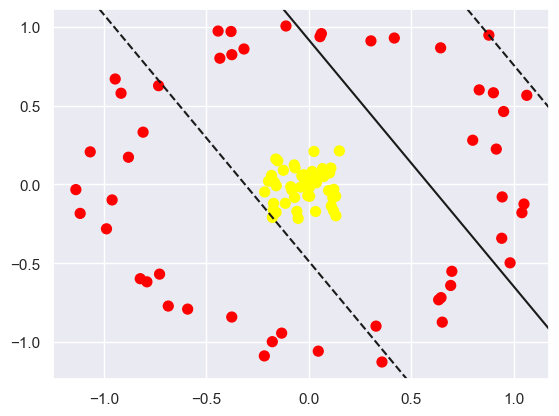

In [15]:
from sklearn.datasets import make_circles
X, y = make_circles(100,factor=.1,noise=.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

It is clear that no linear discrimination will ever be able to sepatrate this data.

We can visualize this data dimension using a three-dimensional plot.

In [21]:
from mpl_toolkits import mplot3d
from ipywidgets import interact,fixed

r = np.exp(-(X**2).sum(1))
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
interact(plot_3D,elev=[45,0,-45],azip=(-180,180),
        X=fixed(X),y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(45, 0, -45), value=45), IntSlider(value=30, descri…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.12415925,  0.08958097],
       [-0.0881896 , -0.01453409],
       [-1.11586183, -0.18382265],
       [-1.06677823,  0.20669271],
       [ 0.04626108, -1.05809492],
       [-0.02454495,  0.06150071],
       [-0.2153613 , -0.04780138],
       [-0.73301662,  0.6267241 ],
       [ 0.14921822,  0.21276705],
       [-0.44262178,  0.97341584],
       [-0.31641404,  0.85951896],
       [-0.94488139,  0.66909057],
       [-0.05190269, -0.21528471],
       [-0.82254805, -0.59827831],
       [-0.06962713, -0.0827608 ],
       [ 0.07279105,  0.0501141 ],
       [-0.59123758, -0.7911989 ],
       [ 0.12192556, -0.03126353],
       [-0.79013584, -0.61806599],
       [ 0.04192286,  0.04281027],
       [ 0.1205951 , -0.1669399 ],
       [-0.68585427, -0.77180293],
       [-0.08256913, -0.03564078],
       [ 0.11712139, -0.0848842 ],
       [-0.91628469,  0.57878701],
       [ 0.87901037,  0.94732062],
       [ 0.0137761 ,  0.04521084],
       [

In Scikit-Learn, we can apply kernelized SVM simply by changing our kernel to an RBF(radial basis function) kernel, using the kernel model hyperparameter:

In [22]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

SVC(C=1000000.0)

/var/folders/7k/578pqnvd7t9_87g17msvh4100000gn/T/ipykernel_12490/2909079731.py:16: UserWarning: The following kwargs were not used by contour: 'alpla'
  ax.contour(X,Y,p,colors='k',


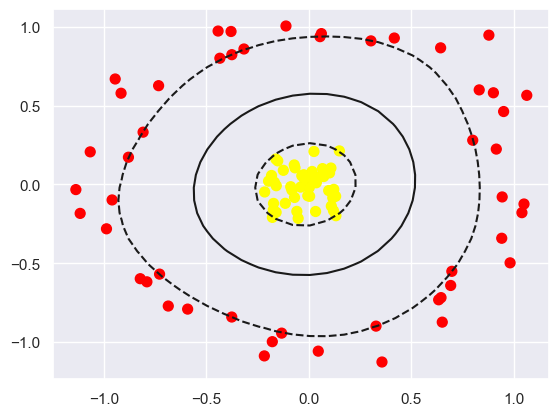

In [24]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='none')

Using this kernelized support vector machine, we laern a suitable nonlinear decision boundary.

# Tuning the SVM: Softening margins 

What if your data has some amount of overlap? For example, you may data like this:

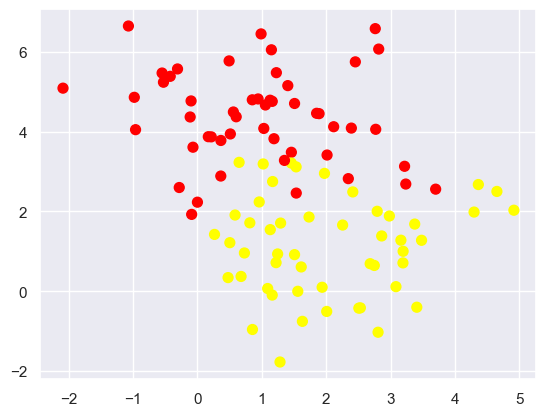

In [25]:
X, y = make_blobs(n_samples=100,centers=2,
                  random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

To handle this case, the SVM implementaion has a bit of a fudge-factor that "softens" the margin. The hardness of the margin is controlled by a tuning parameter, most often known as C. For vary large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to ancompass come points.

/var/folders/7k/578pqnvd7t9_87g17msvh4100000gn/T/ipykernel_12490/2909079731.py:16: UserWarning: The following kwargs were not used by contour: 'alpla'
  ax.contour(X,Y,p,colors='k',
/var/folders/7k/578pqnvd7t9_87g17msvh4100000gn/T/ipykernel_12490/2909079731.py:16: UserWarning: The following kwargs were not used by contour: 'alpla'
  ax.contour(X,Y,p,colors='k',


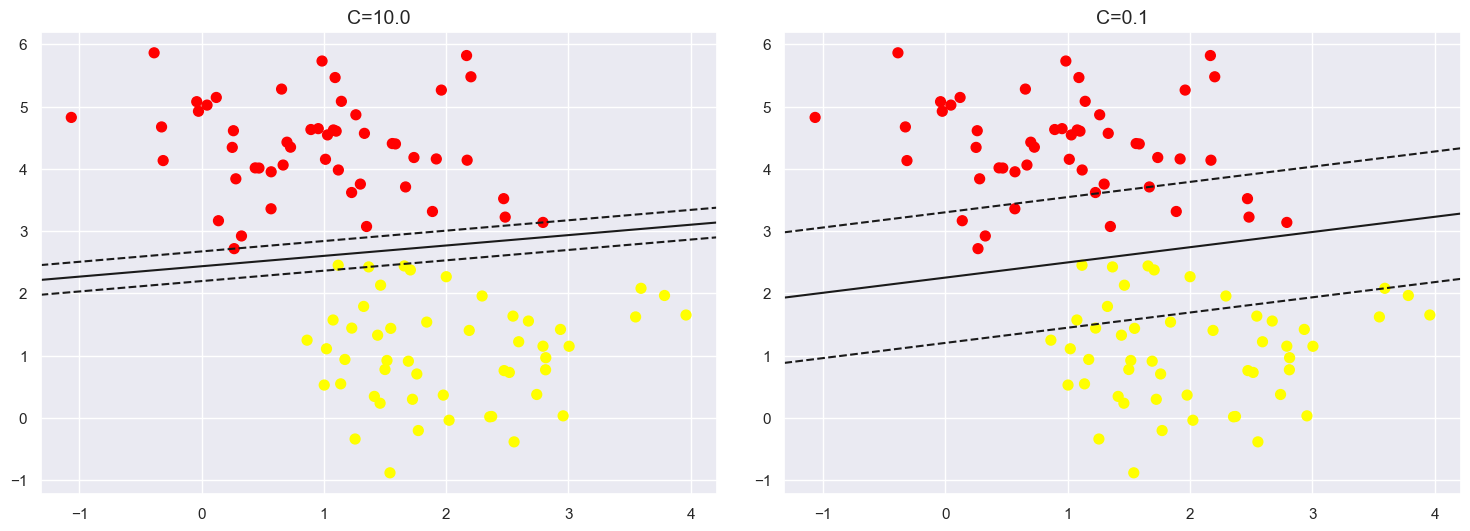

In [28]:
X,y = make_blobs(n_samples=100, centers=2,
                random_state=0,cluster_std=0.8)

fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for axi,C in zip(ax,[10.0,0.1]):
    model = SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,lw=1,facecolors='none');
    axi.set_title('C={0:.1f}'.format(C),size=14)